<center>

# **PA3:  SVM And Classification Using Random Forests**



# Part 1:IMPLEMENTING SVM FROM SCRATCH  (100 marks)

You are <span style="color: red;">not allowed</span> to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own SVM classifier from scratch.

### Importing Libraries

All of the necessary libraries for this part have been imported for you below. You may not use any other library apart from standard Python librares.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Task 1.1: VISUALISING THE DATA SET 

For this part of the assignment, you have already been provided with a linearly separable dataset.

It has also been plotted for you.

Carefully analyze it and use it in the next part.

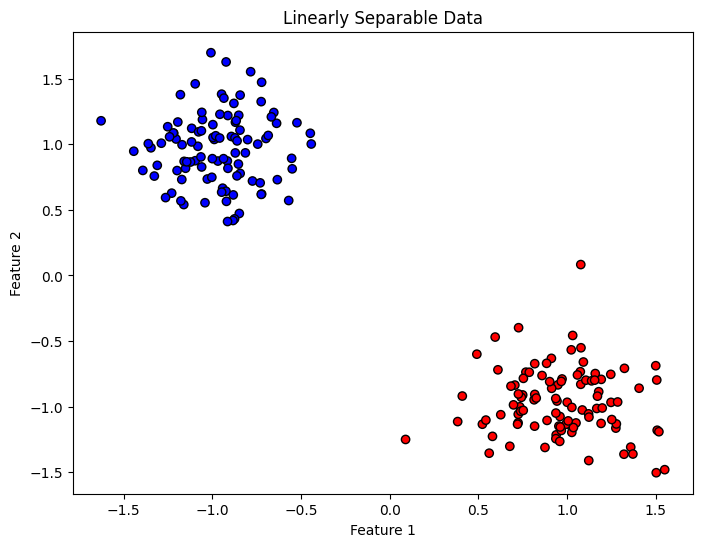

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1)

y = np.where(y == 0, -1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data')
plt.show()


"""
## Task 1.2: Implementing an SVM Classifier from Scratch   (40 marks)

Now you will create your own **Support Vector Machine (SVM) classifier** by implementing the following functions:  

---

### **Step 1: Understanding SVM**
- **Support Vector Machines (SVMs)** are supervised learning models used for binary classification.
- The model finds a **hyperplane** that best separates two classes.
- If the data is **not linearly separable**, a **kernel trick** is applied to project it into a higher-dimensional space.

---

### **Step 2: Implementing Key Functions**

#### 1. `fit(self, X, y)`
📌 **Objective:** Train the SVM model using a **gradient-based approach**.  

💡 **Implementation Guide:**  
- Initialize the **weight vector** (`w`) and **bias** (`b`) to zeros.  
- Iterate over the dataset for `n_iters` times.  
- For each sample, check if it violates the **margin condition**:  
- **TODO:** Implement weight and bias updates in the `fit` function.

---

#### 2. `predict(self, X)`
📌 **Objective:** Predict class labels for the given test dataset.

💡 **Implementation Guide:**  
- Compute the **decision function**:
  \[
  f(x) = w.x + b
  \]
- Assign a **label** based on the sign of `f(x)`:  
  - If `f(x) > 0`, predict `+1`
  - If `f(x) < 0`, predict `-1`
- **TODO:** Implement the decision function using numpy operations.

---

#### 3. `evaluate(self, X, y)`
📌 **Objective:** Evaluate the model on a test set and return accuracy.



In [10]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        '''
          Initializes the class with learning rate and number of iterations.
        '''
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None  # Weight vector
        self.b = 0  # Bias term

    def fit(self, X, y):
        '''
          Trains the SVM model using a simple gradient-based approach.

          Steps:
          1. Initialize the weight vector `w` and bias `b` to zeros.
          2. Iterate over the dataset for the given number of iterations.
          3. For each sample, check if it is misclassified:
             - If misclassified, update `w` and `b` based on the learning rate.
          
          TODO: Implement the weight and bias updates based on the hinge loss condition.
        '''
        pass  # Replace this with your implementation

    def predict(self, X):
        '''
          Predicts the labels for a given test dataset.

          Steps:
          1. Compute the decision function: `y_hat = sign(X @ w + b)`
          2. Return the predicted labels.

          TODO: Implement the decision function using numpy operations.
        '''
        pass  # Replace this with your implementation

    def evaluate(self, X, y):
        '''
          Evaluates the model on the test set and returns accuracy.

          Steps:
          1. Use the `predict` function to get predictions.
          2. Compare predictions with actual labels.
          3. Compute accuracy as the fraction of correct predictions.

          TODO: Implement the accuracy calculation.
        '''
        pass  # Replace this with your implementation


## Task 1.3: Evaluation
**Run the cell below to observe your evaluation.**

**Hint:This is a perfectly lineraly seperable data**

In [12]:
svm = SVM()
svm.fit(X, y)
accuracy = svm.evaluate(X, y)
print("Accuracy :", accuracy)

Accuracy : None


## Task 1.4: Plot the decision Boundary
**TODO: define the  plot_decision_boundary(svm, X, y) function
 below to observe the descision boundary**

In [ ]:
def plot_decision_boundary(svm, X, y):
    """Plots the decision boundary for a trained SVM model."""
    

## TASK 2 : MULTI-CLASS SVM (30 marks)

### TASK 2.1: VISUALISE THE MULTI-CLASS DATASET
**You have been provided the muticlass dataset below which you will classify in the next part**

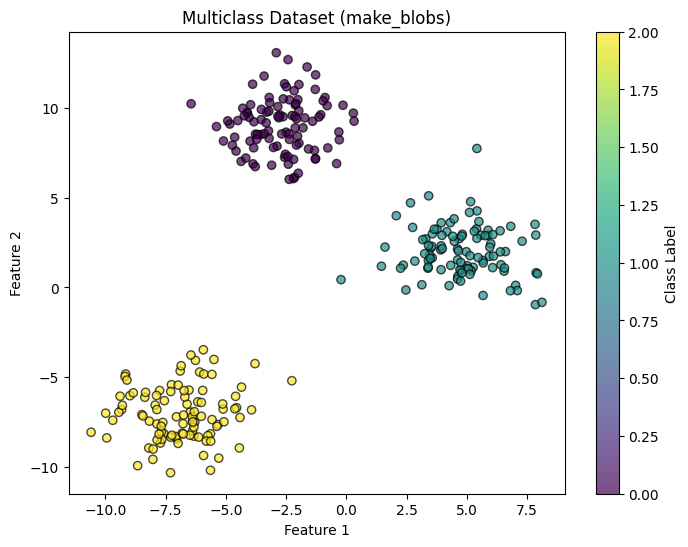

In [ ]:

X_multi, y_multi = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.5)

y_multi = y_multi.astype(int) 

plt.figure(figsize=(8, 6))
plt.scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title("Multiclass Dataset (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class Label")
plt.show()


## **Task 2.2: Modify SVM for Multi-Class Classification (One-vs-All)**
In this section, we will extend our binary SVM to handle **multi-class classification** using the **One-vs-All (OvA)** approach.

---

### **Approach: One-vs-All (OvA)**
Instead of a single SVM, we train **C binary SVM models**, where **C** is the number of unique classes in the dataset.

For each class \( c \):
1. Convert the labels into a **binary problem**:
   - Assign **+1** to samples belonging to class \( c \).
   - Assign **-1** to all other samples.
2. Train a **separate binary SVM** using this modified dataset.

Once all SVMs are trained, we make predictions by selecting the class with the **highest decision score**.

---

### **Why Use Softmax?**
By default, multi-class SVM predicts the class with the **highest raw score**. However, these scores are **not probabilities**, making it hard to interpret confidence.  

To address this, we apply the **Softmax function** to convert decision scores into probabilities:

$$
P(y = c \mid X) = \frac{e^{s_c}}{\sum_{j=1}^{C} e^{s_j}}
$$

where:
- \( s_c \) is the decision score for class \( c \).
- \( C \) is the number of classes.
- The denominator ensures probabilities sum to 1.

---

### **Function Breakdown**
Below are the key functions you will implement:

#### **`softmax(scores)`**
- **Purpose**: Converts raw decision scores into probability distributions.
- **Steps**:
  1. Subtract the maximum score (stability trick).
  2. Apply the **exponential function**.
  3. Normalize by dividing by the sum of exponentials.

---

#### **`train_multiclass_svm(X, y, learning_rate=0.01, n_iters=1000)`**
- **Purpose**: Trains multiple binary SVM classifiers using **One-vs-All (OvA)**.
- **Steps**:
  1. Identify the unique **classes** in `y`.
  2. For each class:
     - Convert labels to **binary** (`+1` for current class, `-1` for others).
     - Train a **binary SVM** using the `fit` function.
  3. Store the trained **SVM models**.

---

#### **`predict_multiclass_svm_softmax(X, classifiers, classes)`**
- **Purpose**: Uses trained SVM models to predict class probabilities.
- **Steps**:
  1. Compute **decision scores** from all trained SVMs.
  2. Apply the **Softmax function** to obtain class probabilities.
  3. Return the class with the **highest probability**.

---

#### **`evaluate_multiclass_svm_softmax(X, y, classifiers, classes)`**
- **Purpose**: Evaluates the performance of the multi-class SVM.
- **Steps**:
  1. Use `predict_multiclass_svm_softmax` to get class predictions.
  2. Compare predictions with true labels `y`.
  3. Compute **accuracy** as the fraction of correct predictions.


In [ ]:

def softmax(scores):
    """
    Compute the softmax probabilities from raw decision scores.

    Args:
    - scores: Array of shape (num_samples, num_classes) containing decision scores.

    Returns:
    - probabilities: Softmax probabilities of shape (num_samples, num_classes).
    """
    

def train_multiclass_svm(X, y, learning_rate=0.01, n_iters=1000):
    """
    Train multiple binary SVM classifiers using One-vs-All (OvA).
    """
    classes = np.unique(y)
    classifiers = {}

    
    return classifiers, classes

def predict_multiclass_svm_softmax(X, classifiers, classes):
    """
    Predict class probabilities using Softmax over SVM decision scores.
    """
    

def evaluate_multiclass_svm_softmax(X, y, classifiers, classes):
    """
    Evaluate multi-class SVM using Softmax-based predictions.
    """
    



## TASK 2.3: Evaluation and Visualisation

**TODO:evaluate the model on the given dataset**

**TODO: Plot the descision boundary showing the three classes and the boundaries**

In [ ]:
## your code here 

## Task 3: KERNALIZED SVM (30 marks)





## TASK 3.1:

**Now we will be working with a non linearly seperable dataset**

**You have already been provided the dataset below**

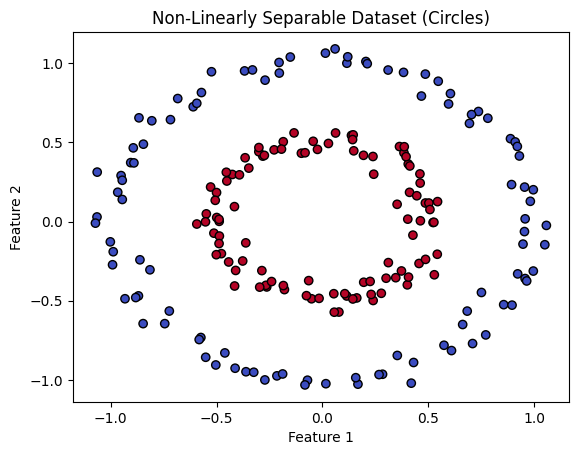

In [ ]:
from sklearn.datasets import make_circles

X_circles, y_circles = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=42)

y_circles = np.where(y_circles == 0, -1, 1)

plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap=plt.cm.coolwarm, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non-Linearly Separable Dataset (Circles)")
plt.show()


## TASK 3.2: Evaluating the Linear SVM on non linear data

**Before we start implenting the kernalised SVM we should see the inution behind it**

**To motivate this we will use our vanilla linear classifier that we made in task 1.2 to form the descion boundary**

**TODO: Evaluate your model from part 1.2 on this circles dataset**


In [ ]:
## return the accuracy

## TASK 3.3: **Kernelized SVM Implementation**  

This class implements **Kernelized Support Vector Machine (SVM)** for classification tasks. It extends traditional SVM by using **kernel functions**, allowing it to handle **non-linearly separable data**.  

---

#### **1. Class Overview**  

- **`__init__`**: Initializes hyperparameters like learning rate, regularization (`lambda`), number of iterations, and kernel type.  
- **`polynomial_kernel(X, Y)`**: Computes the **polynomial kernel** using:  
  $$K(x, y) = (x \cdot y + 1)^{\text{degree}}$$  
- **`compute_kernel(X, Y)`**: Selects and applies the appropriate kernel function to input data.  

---

#### **2. Training the Model (`fit`)**  

The **dual optimization problem** for SVM is solved using **gradient-based updates**:  

1. **Initialize** Lagrange multipliers `alpha` and bias `b` to zero.  
2. **Compute the kernel matrix**:  
   $$K(x_i, x_j)$$  
3. **Iterate** over the dataset for `n_iters`:  
   - Check the **margin condition**:  
     $$y_i \cdot f(x_i) < 1$$  
   - If true, update `alpha` and `b`:  
     $$\alpha_i \leftarrow \alpha_i + \eta \cdot (1 - y_i \sum \alpha_j y_j K(x_j, x_i))$$  
     $$b \leftarrow b + \eta \cdot y_i$$  
4. Repeat until convergence.  

---

#### **3. Making Predictions (`predict`)**  

After training, predictions are made using:  

$$f(x) = \sum (\alpha_i y_i K(x_i, x)) + b$$  

The final prediction is determined by the **sign** of \( f(x) \):  

$$\hat{y} = \text{sign}(f(x))$$  

---

#### **4. Evaluation (`evaluate`)**  

This function compares the predicted labels with actual labels and returns the **accuracy** of the model.  

---

Now, implement the **KernelSVM** class below. 🚀  


In [ ]:

class KernelSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.001, n_iters=1000, kernel="linear", degree=3, gamma=0.5, custom_kernel=None):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.kernel = kernel
        self.custom_kernel = custom_kernel  
        self.alpha = None
        self.b = None
        self.X_train = None
        self.y_train = None

    def linear_kernel(self, X, Y):
        pass  

    def polynomial_kernel(self, X, Y):
        pass  

    def compute_kernel(self, X, Y):
        pass  

    def fit(self, X, y):
        pass  

    def predict(self, X):
        pass  

    def evaluate(self, X, y):
        pass  


## TASK 3.4: Evaluation and Visualising
**Now you will evaluate your model above(return the accuracy on the circles dataset)**

**Plot the descision boundary showing how your model performs on the circles dataset**


In [ ]:
"""
TODO: evaluate the model and return the accuracy
"""

"""
TODO: plot the descion boundary
"""

# **Random Forest Classifier**


# 🌲 **Understanding Random Forests: A Powerful Classification Algorithm**

## 🔍 **What is Random Forest?**
Random Forest is an ensemble learning method that constructs multiple decision trees during training and merges their outputs for better accuracy and stability. It reduces overfitting by averaging predictions from multiple trees.

## 🛠 **How Does Random Forest Work?**
1. **Bootstrap Sampling**: It randomly selects subsets of data for each tree.
2. **Feature Selection**: At each split, it selects the best among randomly chosen features.
3. **Tree Construction**: Each decision tree is grown independently.
4. **Prediction Aggregation**: For classification, it takes the majority vote from all trees.

## 🎯 **Why Use Random Forest?**
✅ Handles missing values well.  
✅ Works well with large datasets.  
✅ Reduces overfitting by combining multiple trees.  
✅ Can handle both classification and regression tasks.  

Let's implement it step by step! 🚀

![Image Description](https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg)


## 🏗 **Implementation Guidance**  
- We will start by implementing decision trees.  
- Then, we will build a random forest by combining multiple trees.  
- Finally, we will compare our model with `sklearn`'s RandomForestClassifier.  


# Part 2.1: Random Forest classification from Scratch (70 marks)

You are <span style="color: red;">not allowed</span> to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own random forest classifier from scratch.

## **Importing Libraries**

All of the necessary libraries for this part have been imported for you below. You may not use any other library apart from standard Python librares.


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt




# **Loading a CSV Dataset into a Pandas DataFrame**



## We will be using the data.csv dataset provided for the Part2 of the assignment.

## **Overview**
To analyze and process data, we first need to load it into a **Pandas DataFrame**. This function helps in efficiently reading a CSV file and storing it in a structured format.

## **Function: `load_csv(filename)`**
This function reads a CSV file and loads it into a Pandas **DataFrame**.

### **Implementation Details**
- Uses `pd.read_csv()` to load the dataset from the specified file path.
- Returns the loaded DataFrame, which can then be explored and used for further processing.





In [1]:
def load_csv(filename):
    """
    Loads a CSV file into a Pandas DataFrame.
    
    Parameters:
    filename (str): The name or path of the CSV file to be loaded.
    
    Returns:
    pd.DataFrame: A DataFrame containing the dataset.
    """
    pass   # Replace this with your implementation

dataset = None

# **Label Encoding for Binary Classification**

## **Overview**
Before training the model, categorical labels in the dataset need to be converted into numerical values. This process, known as **label encoding**, is essential for machine learning models that require numerical inputs.

## **Function: `encode_label_column(df)`**
This function encodes the `"class"` column with binary values (0 and 1) based on the unique class labels.

### **Implementation Details**
- Identifies the unique class labels in the `"class"` column.
- Maps the first unique value to `0` and the second unique value to `1`.
- Modifies the original DataFrame by replacing the categorical labels with numerical values.



In [ ]:
def encode_label_column(df):
    """
    Encodes the 'label' column with binary values (0 and 1).

    Parameters:
    df (pd.DataFrame): The DataFrame containing the 'Label' column.

    Returns:
    pd.DataFrame: The modified DataFrame with the 'Label' column encoded as 0 and 1.
    """
    pass # Replace this with your implementation

df = encode_label_column(dataset)

# display the dataframe using df.head()




# **Random Forest Classifier from Scratch**

## **Overview**
This section implements a Random Forest classifier from scratch using decision trees. The model is designed for classification tasks and supports:
- **Bootstrap Sampling**: Randomly selecting subsets of data for each tree.
- **Feature Subsampling**: Using a random subset of features for each split.
- **Gini Index for Splitting**: Measuring impurity to determine the best split.
- **Bagging for Prediction**: Aggregating predictions from multiple decision trees.
- **Cross-Validation**: Evaluating the model with k-fold cross-validation.
- **Feature Importance Calculation**: Determining the most influential features.

## **Implementation Details**
### **1. Model Initialization**
- `max_depth`: Maximum depth of each decision tree.
- `min_size`: Minimum number of samples required to split a node.
- `sample_size`: Percentage of the dataset used to train each tree.
- `n_trees`: Number of decision trees in the forest.
- `n_features`: Number of features considered for splitting at each node.
- `random_state`: Ensures reproducibility.

### **2. Core Functions**
### The following decision tree construction functions have been provided. Do NOT change these.
#### **Decision Tree Construction**
- `test_split(index, value, dataset)`: Splits data into left and right subsets based on a feature and threshold.
- `gini_index(groups, classes)`: Computes impurity to evaluate a split.
- `get_split(dataset)`: Finds the best feature and value to split the data.
- `split(node, depth)`: Recursively splits the dataset until stopping criteria are met.
- `build_tree(train)`: Constructs a decision tree.
- `predict(node, row)`: Traverses a decision tree to make a prediction.
- `to_terminal(self, group)`: Creates a terminal node with the most common class value.

### You need to implement the following functions.
#### **Random Forest Training and Prediction**
- `subsample(dataset)`: Creates a bootstrap sample of the dataset.
- `fit(train)`: Trains multiple decision trees on random subsets.
- `bagging_predict(row)`: Aggregates predictions from multiple trees.


#### **Model Evaluation**
- `cross_validation_split(dataset, n_folds)`: Splits data into `n_folds` for cross-validation.
- `evaluate(dataset, n_folds)`: Runs k-fold cross-validation and computes accuracy.

#### **Feature Importance Analysis**
- `calculate_feature_importance(num_features)`: Computes feature importance based on split frequency.
- `get_feature_importance(feature_names)`: Maps feature names to their importance scores.



In [ ]:
class RandomForest:
    """
    Implements the Random Forest algorithm for classification.
    """
    
    def __init__(self, max_depth, min_size, sample_size, n_trees, n_features):
        """
        Initializes the Random Forest model.

        Parameters:
        max_depth (int): Maximum depth of each decision tree.
        min_size (int): Minimum size of a node before making it a leaf.
        sample_size (float): Ratio of dataset to use for training each tree.
        n_trees (int): Number of trees in the forest.
        n_features (int): Number of features to consider for each split.
        """
        self.max_depth = max_depth
        self.min_size = min_size
        self.sample_size = sample_size
        self.n_trees = n_trees
        self.n_features = n_features
        self.trees = []
        self.feature_importance = None
        self.random_state=42
        np.random.seed(self.random_state)

    def test_split(self, index, value, dataset):
        """
        Splits a dataset based on an attribute and its value.
        
        Parameters:
        index (int): Index of the attribute to split on.
        value (float): Value of the attribute to use as threshold.
        dataset (DataFrame): The dataset to split.
        
        Returns:
        left (DataFrame), right (DataFrame): Two subsets of the dataset.
        """
        left = dataset[dataset.iloc[:, index] < value]
        right = dataset[dataset.iloc[:, index] >= value]
        return left, right
    
    def gini_index(self, groups, classes):
        """
        Computes the Gini index for a given split.
        
        Parameters:
        groups (tuple of DataFrames): The left and right groups after a split.
        classes (list): Unique class labels in the dataset.
        
        Returns:
        gini (float): The computed Gini index.
        """
        n_instances = sum(len(group) for group in groups)
        gini = 0.0
        for group in groups:
            size = len(group)
            if size == 0:
                continue
            score = sum((sum(group.iloc[:, -1] == class_val) / size) ** 2 for class_val in classes)
            gini += (1.0 - score) * (size / n_instances)
        return gini
    
    def get_split(self, dataset):
        """
        Finds the best attribute and value to split the dataset.
        
        Parameters:
        dataset (DataFrame): The dataset to split.
        
        Returns:
        dict: Contains index of best feature, best value, and resulting groups.
        """
        class_values = dataset.iloc[:, -1].unique()
        best_index, best_value, best_score, best_groups = None, None, float('inf'), None
        features = np.random.choice(range(dataset.shape[1] - 1), self.n_features, replace=False)
        for index in features:
            for value in dataset.iloc[:, index].unique():
                groups = self.test_split(index, value, dataset)
                gini = self.gini_index(groups, class_values)
                if gini < best_score:
                    best_index, best_value, best_score, best_groups = index, value, gini, groups
        return {'index': best_index, 'value': best_value, 'groups': best_groups}
    
    def to_terminal(self, group):
        """
        Creates a terminal node with the most common class value.
        
        Parameters:
        group (DataFrame): The dataset reaching the leaf node.
        
        Returns:
        object: Most common class label.
        """
        return group.iloc[:, -1].mode()[0]
    
    def split(self, node, depth):
        """
        Recursively splits the tree until stopping conditions are met.
        
        Parameters:
        node (dict): Current node containing split information.
        depth (int): Current depth of the tree.
        """
        left, right = node['groups']
        del node['groups']
        if left.empty or right.empty:
            node['left'] = node['right'] = self.to_terminal(pd.concat([left, right]))
            return
        if depth >= self.max_depth:
            node['left'], node['right'] = self.to_terminal(left), self.to_terminal(right)
            return
        for side, data in [('left', left), ('right', right)]:
            if len(data) <= self.min_size:
                node[side] = self.to_terminal(data)
            else:
                node[side] = self.get_split(data)
                self.split(node[side], depth + 1)
    
    def build_tree(self, train):
        """
        Builds a decision tree from training data.
        
        Parameters:
        train (DataFrame): Training dataset.
        
        Returns:
        dict: Root node of the decision tree.
        """
        root = self.get_split(train)
        self.split(root, 1)
        return root
    
    def predict(self, node, row):
        """
        Predicts class label for a given row.
        
        Parameters:
        node (dict): Decision tree node.
        row (Series): Single instance to classify.
        
        Returns:
        object: Predicted class label.
        """
        if row.iloc[node['index']] < node['value']:
            return self.predict(node['left'], row) if isinstance(node['left'], dict) else node['left']
        else:
            return self.predict(node['right'], row) if isinstance(node['right'], dict) else node['right']
    
    def subsample(self, dataset):
        """
        Creates a random subsample of the dataset.
        
        Parameters:
        dataset (DataFrame): The dataset to sample from.
        
        Returns:
        DataFrame: Random subsample.
        """
        pass # Replace this with your implementation
    
    def fit(self, train):
        """
        Trains multiple decision trees.
        
        Parameters:
        train (DataFrame): Training dataset.
        """
        pass # Replace this with your implementation
    
    def bagging_predict(self, row):
        """
        Aggregates predictions from multiple trees.
        
        Parameters:
        row (Series): Single instance to classify.
        
        Returns:
        object: Final predicted class label.
        """
        pass # Replace this with your implementation
    
    def cross_validation_split(self, dataset, n_folds):
        """
        Splits dataset into k folds for cross-validation.
        
        Parameters:
        dataset (DataFrame): Dataset to split.
        n_folds (int): Number of folds.
        
        Returns:
        list: List of DataFrame folds.
        """
        pass # Replace this with your implementation
    
    def evaluate(self, dataset, n_folds):
        """
        Evaluates the model using k-fold cross-validation.
        """
        pass # Replace this with your implementation
        
    def calculate_feature_importance(self, num_features):
        """
        Computes feature importance based on the number of times each feature 
        is used for splitting across all decision trees in the model.
        
        Parameters:
        num_features (int): The total number of features in the dataset.
        
        Updates:
        self.feature_importance (ndarray): A normalized array of feature importance scores.
        """
        pass # Replace this with your implementation
    
    def get_feature_importance(self, feature_names):
        """
        Returns a dictionary mapping feature names to their computed importance scores.
        
        Parameters:
        feature_names (list of str): The names of the features.
        
        Returns:
        dict: A dictionary where keys are feature names and values are their importance scores.
        """
        pass # Replace this with your implementation   



   


# **Hyperparameter Tuning: Number of Trees in Random Forest**

## **Objective**
In this experiment, we evaluate the impact of varying the number of trees (`n_trees`) in a Random Forest classifier on model performance. The goal is to determine the optimal number of trees by comparing accuracy, precision, and F1-score.

## **Steps to Follow**

### **1. Initialize Parameters**
- Define a list of values for `n_trees` (number of decision trees) to test.
- Set fixed values for:
  - `max_depth` = 10 (maximum depth of each decision tree).
  - `min_size` = 1 (minimum samples per leaf node).
  - `sample_size` = 0.8 (proportion of dataset samples used per tree).
  - `n_features` = int((df.shape[1] - 1) ** 0.5) (number of features used per split, computed as \(\sqrt{\text{total features}}\)).
  - `n_folds` = 5 (number of folds for cross-validation).

### **2. Train and Evaluate Random Forest Model**
For each value of `n_trees`:
1. **Initialize** a `RandomForest` instance with the given hyperparameters.
2. **Perform cross-validation**:
   - Train the model on different folds.
   - Compute accuracy scores for each fold.
3. **Compute Performance Metrics**:
   - Calculate mean accuracy.
   - Extract true labels (`y_true`) and predicted labels (`y_pred`) across all folds.
   - Compute **precision** and **F1-score** using weighted averaging.
4. **Store Results**:
   - Append mean accuracy, precision, and F1-score to their respective lists.
   - Update the best performing model based on accuracy.

### **3. Select the Best Model**
- Track the best value of `n_trees` that results in the highest mean accuracy.
- Store the corresponding `y_true` and `y_pred` values for further analysis.

## **Expected Output**
- Fold-wise accuracy for each `n_trees` value.
- Mean accuracy, precision, and F1-score.
- The best `n_trees` based on accuracy.



In [7]:
tree_values = [1, 5, 10, 15, 20]
accuracies = []
precisions = []
f1_scores = []
max_depth = 10
min_size = 1
sample_size = 0.8
n_features = None # use int((df.shape[1] - 1) ** 0.5)  
n_folds = 5 

best_n_trees = None
best_accuracy = 0
best_y_true = None
best_y_pred = None

for n_trees in tree_values:
    pass # Replace this with your implementation


# **Visualization: Impact of Number of Trees on Performance Metrics**

## **Objective**
This section visualizes how the number of trees (`n_trees`) in the Random Forest model affects:
- Mean Accuracy
- Precision
- F1 Score

## **Plot Description**
- We generate three subplots in a single row to compare the effect of `n_trees` on different metrics.
- Each plot represents:
  1. **Mean Accuracy vs. Number of Trees**
  2. **Precision vs. Number of Trees**
  3. **F1 Score vs. Number of Trees** 


# **Confusion Matrix Visualization**

## **Overview**
A **confusion matrix** is a performance evaluation metric for classification models. It helps in understanding how well the model is classifying instances by displaying:
- **True Positives (TP)**: Correctly predicted positive cases.
- **True Negatives (TN)**: Correctly predicted negative cases.
- **False Positives (FP)**: Incorrectly predicted positive cases.
- **False Negatives (FN)**: Incorrectly predicted negative cases.

## **Plotting the Confusion Matrix**
We use **Seaborn's heatmap** to visually represent the confusion matrix.

### **Implementation Details**
- Computes the confusion matrix using `confusion_matrix(y_true, y_pred)`.
- Uses `sns.heatmap()` to plot the matrix with numerical annotations.



# **Feature Importance Calculation in Random Forest**

## **Overview**
Feature importance in a **Random Forest model** helps identify which features contribute the most to model predictions. The higher the importance score, the more influential the feature is in decision-making.

## **Steps Involved**
1. **Selecting the Best Number of Trees (`n_trees`)**  
   - We choose the number of trees that resulted in the highest accuracy during training.
   - Extracts the best value from `tree_values` based on the highest accuracy.

2. **Training the Random Forest Model**
   - Creates a new `RandomForest` instance with optimal parameters.
   - Fits the model to the dataset.

3. **Computing Feature Importance**
   - Calls `calculate_feature_importance()`, which counts the number of times each feature is used for splitting.
   - The importance values are normalized.

4. **Identifying Top Features**
   - The top **5 most important features** are extracted and sorted in descending order.
   - The cumulative contribution of these top 5 features is calculated.




In [10]:
# Uncomment the commented print statements after your implementation
best_n_trees = None # Replace this with your implementation
# print(f" best number of trees: {best_n_trees}")


total_importance = None  # Replace this with your implementation
# print(f" total importance: {total_importance}")

top_features = None # Replace this with your implementation

cumulative_percentage = None # Replace this with your implementation
# print(f"\nTotal Contribution of Top 5 Features: {cumulative_percentage:.2f}%")


# **Feature Importance Visualization in Random Forest**

## **Overview**
After computing feature importance in our **Random Forest model**, we visualize the **top contributing features** using a **horizontal bar plot**. This helps to understand which features have the most impact on predictions.

---

## **Steps Involved**
1. **Create a DataFrame for Top Features**
   - Extract the **top 5 features** and their importance scores.
   - Store them in a Pandas DataFrame for easy plotting.


2. **Visualize Feature Importance using a Bar Chart**
   - A **Seaborn barplot** is used for clear visualization.
   - The features are displayed on the **Y-axis** in descending order of importance.
   - The corresponding importance scores are on the **X-axis**.




In [11]:
importance_df = None # Replace this with your implementation

# **Random Forest Evaluation on Top Features**

## **Overview**
After selecting the **top 5 most important features**, we train and evaluate a **Random Forest classifier** using only these features. The goal is to analyze whether reducing the feature set improves or maintains accuracy.

---

## **Steps Involved**
1. **Select the Top Features**
   - Extract the **top 5 most important features** based on feature importance.
   - Add the **target column** to the dataset.

2. **Run Random Forest on Reduced Feature Set**
   - Iterate over different numbers of trees (`n_trees`).
   - Perform **k-fold cross-validation** to evaluate the model.
   - Compute **accuracy, precision, and F1 score** for each model.

3. **Track the Best Model**
   - Identify the `n_trees` value with the **best accuracy**.
   - Store the corresponding **true and predicted labels** for evaluation.



In [12]:
top_feature_names = None # Replace this with your implementation

df_top = None # Replace this with your implementation

accuracies_top = []
precisions_top = []
f1_scores_top = []

n_features_top = None # use int((df_top.shape[1] - 1) ** 0.5)  

print("\nRunning Random Forest on Dataset with Top Features...\n")

best_n_trees_top = None
best_accuracy_top = 0
best_y_true_top = None
best_y_pred_top = None

for n_trees in tree_values:
    pass # Replace this with your implementation



Running Random Forest on Dataset with Top Features...



# **Effect of n_trees on Model Performance (Top Features)**
## **Overview**
This section visualizes how the number of trees (`n_trees`) in a **Random Forest** affects model performance metrics when using only the **top 5 most important features**.

### **Key Metrics:**
- **Accuracy**: Measures overall correctness of predictions.
- **Precision**: Evaluates the proportion of true positive predictions.
- **F1 Score**: Balances precision and recall for better classification insight.

## **Plot Description**
- We generate three subplots in a single row to compare the effect of `n_trees` on different metrics.
- Each plot represents:
  1. **Mean Accuracy vs. Number of Trees**
  2. **Precision vs. Number of Trees**
  3. **F1 Score vs. Number of Trees** 

# **Confusion Matrix for Best Random Forest Model (Top Features)**
## **Overview**
This section visualizes the **confusion matrix** for the best-performing Random Forest model using only the **top 5 most important features**.

### **Implementation Details**
- Computes the confusion matrix using `confusion_matrix(y_true, y_pred)`.
- Uses `sns.heatmap()` to plot the matrix with numerical annotations.


# Accuracy Comparison: All Features vs. Top Features

## Objective:
Compare the accuracy of the Random Forest model using all features versus only the top selected features.

## Steps:

1. **Set up the plot** with an appropriate figure size.
2. **Plot accuracy for all features** using a line graph with markers.
3. **Plot accuracy for top features** using a different color and lifestyle.
4. **Label the axes** for clarity.
5. **Add a title** to describe the comparison.
6. **Include a grid and legend** for better readability.
7. **Display the plot** to visualize the accuracy trends.





Q1. Comment on the accuracy trends for both models.






Q2. Compare their performance, particularly when the number of trees is 1. Provide appropriate explanations for the observed trends.



### 🌟 You're Halfway There! Keep Going! 🚀
You've implemented Random Forest from scratch and gained valuable insights. Now, let's leverage `sklearn` for further exploration!

# Part 2.2 : Random Forest classification using sklearn library (30 marks)

You are <span style="color: red;">not allowed</span> to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own random forest classifier from scratch.

## **Importing Libraries**

All of the necessary libraries for this part have been imported for you below. You may not use any other library apart from standard Python librares.


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree



# Evaluating Random Forest with Different Tree Counts

## Objective:
Assess the performance of a Random Forest model using different numbers of trees (`n_trees`) and k-fold cross-validation.

## Steps:

1. **Initialize lists** to store accuracy, precision, and F1 scores.
2. **Define cross-validation strategy** using `StratifiedKFold` to ensure balanced splits.
3. **Loop through different tree counts (`n_trees`)** and:
   - Train the sklearn Random Forest model with the specified number of trees.
   - Perform k-fold cross-validation.
   - Calculate accuracy, precision, and F1 scores.
   - Store the results for comparison.
4. **Identify the best-performing model** based on accuracy.
5. **Return the evaluation metrics** for further analysis.

## Expected Outcome:
A summary of accuracy, precision, and F1 score for each `n_trees` value, along with the best-performing tree count.


In [13]:
def evaluate_random_forest(X, y, n_trees_values, n_folds=5):
    """
    Evaluates a Random Forest model using Stratified K-Fold cross-validation.

    Parameters:
    - X (pd.DataFrame): Feature matrix.
    - y (pd.Series): Target labels.
    - n_trees_values (list): Different values of 'n_trees' to evaluate.
    - n_folds (int, optional): Number of folds for cross-validation (default is 5).

    Returns:
    - accuracies (list): Mean accuracy for each 'n_trees' value.
    - precisions (list): Precision scores for each 'n_trees' value.
    - f1_scores (list): F1 scores for each 'n_trees' value.
    - best_n_trees (int): The value of 'n_trees' that gave the highest accuracy.
    - best_y_true (list): True labels corresponding to the best model.
    - best_y_pred (list): Predicted labels corresponding to the best model.
    """
    accuracies = []
    precisions = []
    f1_scores = []
    
    best_n_trees = None
    best_accuracy = 0
    best_y_true = None
    best_y_pred = None

    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for n_trees in n_trees_values:
        pass # Replace this with your implementation



# Evaluating Random Forest on Full Dataset

## Objective:
Analyze the effect of the number of trees (`n_trees`) in a Random Forest model on classification accuracy.

## Steps:

1. **Extract Features and Labels**  
   - `X`: All columns except the last (features).  
   - `y`: The last column (target variable).  

2. **Define Tree Values**  
   - A list of different tree counts to test in the model.

3. **Run Random Forest Evaluation**  
   - Call `evaluate_random_forest(X, y, tree_values)`.  
   - Collect accuracy, precision, and F1 scores for each `n_trees`.

4. **Plot Accuracy vs. Number of Trees**  
   - Use `matplotlib` to visualize the effect of `n_trees` on accuracy.  
   - The plot will show how accuracy changes with different tree counts.

## Expected Outcome:
A graph illustrating the impact of `n_trees` on model accuracy, helping to determine the optimal number of trees.


In [15]:
X = None # use df.iloc[:, :-1] 
y = None # use df.iloc[:, -1]  

tree_values = [1, 5, 10, 15, 20]

print("\nRunning Random Forest on Full Dataset...\n")




Running Random Forest on Full Dataset...



## Feature Importance and Decision Tree Visualization

### 1. Train a Random Forest Model
- A `RandomForestClassifier` is trained with `n_estimators=50` and `max_depth=10` on the dataset.
- The model learns feature importances based on how much they contribute to decision-making.

### 2. Identify Top 5 Features
- Extract feature importances from the trained model.
- Sort them in descending order and select the top 5 most important features.
- Display the selected features.

### 3. Visualize a Single Decision Tree
- Extract one decision tree from the trained random forest using rf_importance.estimators_[0]
- Use `plot_tree()` to visualize its structure.
- Label nodes using feature names and class labels.

### 4. Display the Decision Tree
- Plot the extracted tree with color-coded nodes.
- The title of the plot is set to "Visualization of a Single Decision Tree from Random Forest."


In [ ]:

rf_importance = None # Replace this with your implementation


top_features = None # Replace this with your implementation

# print("Top 5 Features:", top_features)  #uncomment after implementation

X_top = None # Replace this with your implementation
selected_tree = None # use rf_importance.estimators_[0]  


## Evaluating Random Forest on Top 5 Features

### 1. Train and Evaluate the Model
- The `evaluate_random_forest()` function is used to train a `RandomForestClassifier` on only the top 5 most important features.
- Performance metrics such as accuracy, precision, and F1-score are recorded for different values of `n_trees`.

### 2. Plot Accuracy vs. Number of Trees
- A line plot is created to visualize the effect of `n_trees` on model accuracy.
- The x-axis represents the number of trees in the forest.
- The y-axis represents the mean accuracy percentage.
- The plot uses green markers (`'o'`) and a solid line (`'-'`) to indicate accuracy when using only the top 5 features.

### 3. Display the Results
- The grid is enabled for better readability.
- A legend is added to differentiate accuracy trends.
- The title of the plot is set to "Effect of n_trees on Accuracy (Top 5 Features)."


In [17]:
print("\nRunning Random Forest on Top 5 Features...\n")




Running Random Forest on Top 5 Features...



## Confusion Matrix Analysis

### 1. Compute Confusion Matrices
- The confusion matrices for both the full dataset and the top 5 feature dataset are generated using `confusion_matrix()`.
- `best_y_true` and `best_y_pred` are used for the full dataset.
- `best_y_true_top` and `best_y_pred_top` are used for the top 5 feature dataset.

### 2. Visualizing Confusion Matrices
- The first heatmap represents the confusion matrix for the full dataset.
- The second heatmap represents the confusion matrix for the top 5 features dataset.


### 3. Interpretation
- Higher diagonal values indicate better classification performance.
- Off-diagonal values represent misclassifications.
- Comparing both confusion matrices helps assess if using only the top 5 features impacts model performance.




Q1: How does the custom Random Forest implementation compare to the Scikit-learn Random Forest in terms of accuracy and performance?


Answer:

### 🎉 Well Done! 🎉
You've successfully built, evaluated, and visualized a Random Forest model. Proud of you, keep up the great work!